<a href="https://colab.research.google.com/github/Rneron/Python/blob/main/Modelo_de_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Esse é um projeto com o objetivo de criar um modelo usando algorítmos de inteligência artificial para classificação. Precisamos prever o churn dos clientes de uma empresa, ou seja, se eles irão deixa ou não a empresa, para isso usaremos 3 algorítmos que serão mostrados a seguir

In [91]:
import pandas as pd

In [92]:
dados = pd.read_csv("/content/Customer-Churn.csv")

In [93]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [94]:
dados.shape

(7043, 18)

In [95]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

### Transformando as variáveis

In [96]:
traducao_dic = {'Sim': 1,
                'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [97]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

In [98]:
#junção dos dados trasformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


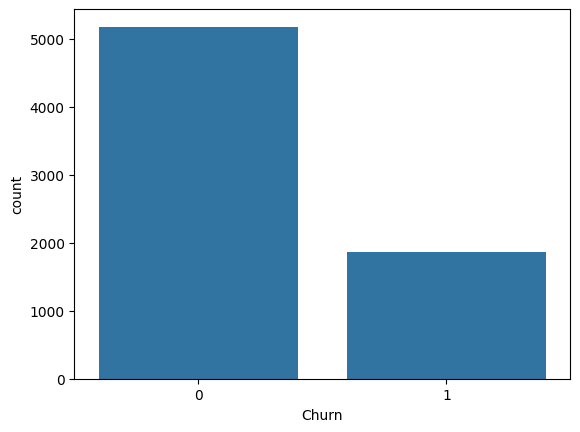

In [99]:
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dados_final)

### Balanceando os dados

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
dados_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [102]:
#dividindo os dados em features e target
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [103]:
smt = SMOTE(random_state=1234)
X, y = smt.fit_resample(X, y)

In [104]:
#junção dos dados balanceados
dados_final = pd.concat([X, y], axis=1)

In [105]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,...,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,1,1,0,2,53.85,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,45,42.30,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,1,0,2,70.70,1,0,0,...,0,0,0,1,0,0,1,0,0,1


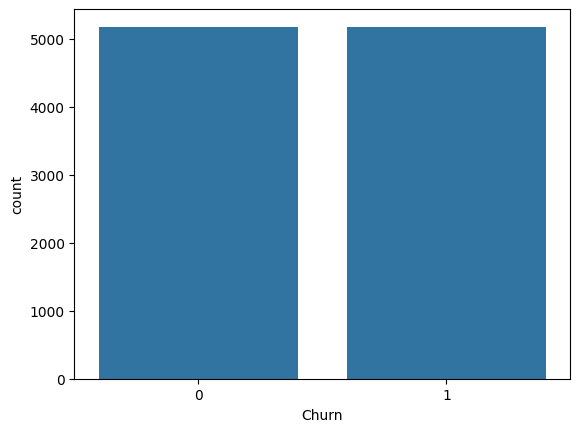

In [106]:
ax = sns.countplot(x='Churn', data=dados_final)

In [107]:
dados_final.Churn.value_counts() # dados balanceados

0    5174
1    5174
Name: Churn, dtype: int64

Queremos prever se Roger irá deixar a empresa, ou seja, baseado nos dados de Roger queremos prever se seu churn será 1 ou 0. Para isso usaremos alguns modelos de classificação.

*   KNN
*   Naive Bayes
*   Arvore de Decisão






In [108]:
Xroger = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]] # features do Roger

### Modelo K-nearest neighbors (KNN)

In [109]:
#Divisão em inputs e outputs
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [110]:
#biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

In [111]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26983133, -0.52696167, -2.99165506, ...,  1.28661413,
        -0.47485319, -0.43664288],
       [-0.78750617, -0.52696167,  0.33426314, ..., -0.77723381,
         2.10591404, -0.43664288],
       [-0.78750617, -0.52696167,  0.33426314, ..., -0.77723381,
         2.10591404, -0.43664288],
       ...,
       [-0.78750617, -0.52696167,  0.33426314, ...,  1.28661413,
        -0.47485319, -0.43664288],
       [-0.78750617, -0.52696167,  0.33426314, ..., -0.77723381,
        -0.47485319, -0.43664288],
       [ 1.26983133, -0.52696167, -2.99165506, ..., -0.77723381,
        -0.47485319,  2.29020111]])

In [112]:
Xroger_normalizado = norm.transform(pd.DataFrame(Xroger, columns = X.columns))
Xroger_normalizado

array([[-0.78750617, -0.52696167,  0.33426314,  0.80386435, -0.41446499,
        -1.1534844 , -0.97190252,  1.13796556, -0.31867567, -0.83267033,
        -0.66439926,  0.9600178 , -0.44524142,  0.87462377, -0.44524142,
        -0.52171909, -0.95890326, -0.44524142,  1.58811961,  1.05300718,
         2.24597251, -0.64316499, -1.1426741 ,  2.24597251, -0.52441617,
         1.20287745, -0.44524142, -0.79089223, -0.82355054, -0.44524142,
         1.26156062, -0.44679864, -1.354647  ,  2.36810436, -0.4271925 ,
        -0.77723381, -0.47485319,  2.29020111]])

### Implementando o modelo

In [113]:
#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [114]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=1234)

In [115]:
#biblioteca para criarmos o modelo (KNN)
from sklearn.neighbors import KNeighborsClassifier

In [116]:
knn = KNeighborsClassifier(metric='euclidean') #usaremos a distância euclidiana por ser mais simples, e usaremos também K=5 por ser o padrão

In [117]:
#treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [118]:
#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)
predito_knn

array([1, 1, 0, ..., 0, 0, 1])

### Modelo Naive Bayes

In [119]:
#biblioteca para criarmos o modelo
from sklearn.naive_bayes import GaussianNB

In [120]:
# Criamos o modelo sem binarizar os dados
mnb = GaussianNB()

In [121]:
#treinar o modelo
mnb.fit(X_treino, y_treino)

GaussianNB()

In [122]:
#testar o modelo
predito_mnb = mnb.predict(X_teste)
predito_mnb

array([1, 1, 1, ..., 0, 0, 1])

### Modelo de Árvore de Decisão

In [123]:
#biblioteca para criarmos o modelo
from sklearn.tree import DecisionTreeClassifier

In [124]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=1234) # foi usado a entropia, porém existem outros critérios

In [125]:
#treinar o modelo
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [126]:
#verificar a importância de cada atributo
dtc.feature_importances_

array([0.01830365, 0.02339637, 0.00105856, 0.01827313, 0.01778554,
       0.16332836, 0.20729557, 0.01595147, 0.00649089, 0.01378725,
       0.00029715, 0.03106058, 0.        , 0.01290908, 0.        ,
       0.01738913, 0.01497439, 0.        , 0.01033347, 0.00792674,
       0.00240238, 0.01064145, 0.01006658, 0.        , 0.01196358,
       0.00810841, 0.        , 0.00926927, 0.00959982, 0.00479991,
       0.01146169, 0.0387265 , 0.1573428 , 0.07085339, 0.01612366,
       0.025803  , 0.01522469, 0.01705156])

In [127]:
predito_ArvoreDecisao = dtc.predict(X_teste)
predito_ArvoreDecisao

array([1, 1, 0, ..., 0, 0, 0])

### Validação dos modelos

### Matriz de confusão

In [128]:
from sklearn.metrics import confusion_matrix

In [129]:
print(confusion_matrix(y_teste, predito_knn))

[[1244  335]
 [ 257 1269]]


In [130]:
print(confusion_matrix(y_teste, predito_mnb))

[[1069  510]
 [ 180 1346]]


In [131]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1264  315]
 [ 269 1257]]


### Acurácia

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
#modelo KNN
print(accuracy_score(y_teste, predito_knn))

0.8093397745571659


In [134]:
#modelo naive bayes
print(accuracy_score(y_teste, predito_mnb))

0.7777777777777778


In [135]:
#modelo árvore de decisão
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.8119162640901771


### Precisão

In [136]:
from sklearn.metrics import precision_score

In [137]:
#modelo KNN
print(precision_score(y_teste, predito_knn))

0.7911471321695761


In [138]:
#modelo naive bayes
print(precision_score(y_teste, predito_mnb))

0.7252155172413793


In [139]:
#modelo árvore de decisão
print(precision_score(y_teste, predito_ArvoreDecisao))

0.799618320610687


### Recall

In [140]:
from sklearn.metrics import recall_score

In [141]:
#modelo KNN
print(recall_score(y_teste, predito_knn))

0.8315858453473133


In [142]:
#modelo naive bayes
print(recall_score(y_teste, predito_mnb))

0.8820445609436435


In [143]:
#modelo árvore de decisão
print(recall_score(y_teste, predito_ArvoreDecisao))

0.8237221494102228


### Escolhendo o melhor modelo : como critério iremos usar a precisão pois estamos mais interessados no verdadeiros positivos que seriam aqueles clientes com churn 1, ou seja, que irão deixar a empresa, dessa forma precisamos ter uma taxa de acerto maior nesses casos, e a precisão nos da essa informação.

In [144]:
print('Modelo KNN: ', precision_score(y_teste, predito_knn))
print('Modelo Naive Bayes: ', precision_score(y_teste, predito_mnb))
print('Modelo Árvore de Decisão: ', precision_score(y_teste, predito_ArvoreDecisao))

Modelo KNN:  0.7911471321695761
Modelo Naive Bayes:  0.7252155172413793
Modelo Árvore de Decisão:  0.799618320610687


### Dessa forma entre os modelos aquele que se saiu melhor para prever o churn foi o Modelo Árvore de decisão